# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [3]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

29832


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [4]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [5]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'chromosome_scaling')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\figures.


# Plotting parameters

In [6]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [7]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codess

In [8]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [9]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [10]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load spatial distance from matrices

In [12]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


In [13]:
class_2_info_filename = os.path.join(input_folder, 'subclass_2_cellInfo.pkl')
class_2_infoDict = pickle.load(open(class_2_info_filename, 'rb'))

# inspect cell numbers for quality control
sel_class_list = []
for _cls, _info_list in class_2_infoDict.items():
    #print(_cls, len(_info_list))
    # include most cell types with abundant number; remove Peri because no snRNAseq data
    if len(_info_list) > len(class_2_infoDict['Peri']): 
        sel_class_list.append(_cls)
        
np.array(sel_class_list)

array(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT',
       'L5 ET', 'Pvalb', 'L6 IT', 'L6b', 'Sst', 'L4/5 IT', 'L2/3 IT'],
      dtype='<U7')

# Load RNA from snRNAseq

In [15]:
import scanpy as sc
sn_RNA_folder = r'L:\Shiwei\DNA_MERFISH_analysis\10x_nuclei_v3_MOp_AIBS\Analysis_10X_nuclei_v3_AIBS\processed'
sn_adata = sc.read(os.path.join(sn_RNA_folder,r'MOp_10x_sn_filtered_unnorm_w_label.h5ad'))
sn_adata

AnnData object with n_obs × n_vars = 40166 × 25644
    obs: 'aggr_num', 'umi.counts', 'gene.counts', 'library_id', 'tube_barcode', 'Seq_batch', 'Region', 'Lib_type', 'Gender', 'Donor', 'Amp_Name', 'Amp_Date', 'Amp_PCR_cyles', 'Lib_Name', 'Lib_Date', 'Replicate_Lib', 'Lib_PCR_cycles', 'Lib_PassFail', 'Cell_Capture', 'Lib_Cells', 'Mean_Reads_perCell', 'Median_Genes_perCell', 'Median_UMI_perCell', 'Saturation', 'Live_percent', 'Total_Cells', 'Live_Cells', 'method', 'exp_component_name', 'mapped_reads', 'unmapped_reads', 'nonconf_mapped_reads', 'total.reads', 'doublet.score', 'subclass_label', 'class_label', 'cluster_label', 'cluster_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'neuron_identity', 'class_label_new', 'subclass_label_new'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_

## transcripts' genomic information

Example table can be found as:

[MOp_10x_snRNA_chr_info_NEW_from_transcriptome_FORMAT](../../external/resources/MOp_10x_snRNA_chr_info_NEW_from_transcriptome_FORMAT.csv)

In [18]:
# a curated file containing the genomic coordinate info for all transcripts
clean_gene_df =pd.read_csv(os.path.join(sn_RNA_folder, "MOp_10x_snRNA_chr_info_NEW_from_transcriptome_FORMAT.csv"), index_col=0)
clean_gene_df.head()

,chr,start,end,gene_biotype,coding_strand,length,genomic_position
gene,,,,,,,
Xkr4,1,3205901,3671498,protein_coding,-1,465597,chr1_3205901_3671498
Gm1992,1,3466587,3513553,antisense,1,46966,chr1_3466587_3513553
Gm37381,1,3905739,3986215,lincRNA,-1,80476,chr1_3905739_3986215
Rp1,1,3999557,4409241,protein_coding,-1,409684,chr1_3999557_4409241
Sox17,1,4490931,4497354,protein_coding,-1,6423,chr1_4490931_4497354


In [19]:
# filter adata with known chromosome information
sn_adata.var[clean_gene_df.columns]=clean_gene_df
chrom_list = [c for c in np.unique(codebook_df['chr']) if c!= 'Y']
chrom_list = [c for c in chrom_list  if c!='X']
chrom_list.sort(key = int)
chrom_list.append('X')
filtered_adata = sn_adata[:,sn_adata.var['chr'].isin(chrom_list)]

## summarize RNA level by chromosome

In [20]:
groupby = 'subclass_label_new'

expression_chr_dict = {'celltype':[], 'chr':[], 
                       'chromosome_expression':[],
                       #'chromosome_mean_expression':[],
                      }

import tqdm
for sel_chrom in tqdm.tqdm(chrom_list):
    sel_chrom = f'chr{sel_chrom}'

    for sel_celltype in sel_class_list:
        sel_adata = filtered_adata[filtered_adata.obs[groupby]==sel_celltype]
        sel_adata_chr = sel_adata[:, sel_adata.var['chr']==sel_chrom.split('chr')[1]]

        expression_celltype = np.nanmedian(np.sum(sel_adata_chr.X.toarray(),axis=1))
        #mean_expression_celltype = np.nanmedian(np.mean(sel_adata_chr.X.toarray(),axis=1))

        expression_chr_dict['celltype'].append(sel_celltype)
        expression_chr_dict['chr'].append(sel_chrom)

        expression_chr_dict['chromosome_expression'].append(expression_celltype)
        #expression_chr_dict['chromosome_mean_expression'].append(mean_expression_celltype)
    
expression_chr_df = pd.DataFrame(expression_chr_dict)

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:32<00:00,  1.62s/it]


In [21]:
expression_chr_df.head()

,celltype,chr,chromosome_expression
0,Oligo,chr1,239.0
1,L5 IT,chr1,1189.0
2,Micro,chr1,157.0
3,Peri,chr1,NaN
4,Endo,chr1,224.0


# Calculate power law scaling vs. genomic distance for each chromosome

In [26]:
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr, spearmanr
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel
from scipy.ndimage import gaussian_filter
from numpy import ma
from scipy.optimize import curve_fit

def power_law(x, a, k):
    return a * np.power(x, k)

In [23]:
# excluding ChrX and ChrY
sorted_chroms = [str(_ch) for _ch in range(1,20)]

In [24]:
# short-range and long-range
distance_cutoff_dict = {'short_range':[0,1e7], 'long_range':[1e7,np.inf]}

In [27]:
# init dict to save results
scaling_result_dict = {'chr':[], 'celltype':[], 
                       'genomic_range':[], 'k':[],
                       }



for chosen_chrom in sorted_chroms[:]:
    _chr_codebook = codebook_df.loc[codebook_df['chr']==chosen_chrom]
    for sel_celltype in sel_class_list:
    #for sel_celltype in class_2_medianDict.keys():
        
        _region_centers = np.sort([np.mean(np.array(_n.split(chosen_chrom+':')[1].split('-'), dtype=np.int32)) 
                                   for _n in _chr_codebook['name']])
        median_mat = class_2_medianDict[sel_celltype][f'cis_{chosen_chrom}']
        gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))
        # keep original entries as they will be sliced twice by genomic distance below
        gdist_entries_ori = gdist_mat[np.triu_indices(len(gdist_mat),1)]
        median_entries_ori = median_mat[np.triu_indices(len(median_mat),1)]
        
        # slice by genomic distance
        for _dist_range, distance_cutoff in distance_cutoff_dict.items():
            mask = (gdist_entries_ori > distance_cutoff[0]) & (gdist_entries_ori < distance_cutoff[1])
            gdist_entries = gdist_entries_ori[mask]
            median_entries = median_entries_ori[mask]

            valid_inds = np.isfinite(np.log(gdist_entries)) & np.isfinite(np.log(median_entries))
            gdist_entries = gdist_entries[valid_inds]
            median_entries = median_entries[valid_inds]

            params, cov = curve_fit(power_law, gdist_entries, median_entries)
            a_fit, k_fit = params
            std_devs = np.sqrt(np.diag(cov))
            std_a, std_k = std_devs
            
            # append result
            scaling_result_dict['chr'].append(chosen_chrom)
            scaling_result_dict['celltype'].append(sel_celltype)
            scaling_result_dict['genomic_range'].append(_dist_range)
            scaling_result_dict['k'].append(k_fit)
            
            
scaling_result_df = pd.DataFrame(scaling_result_dict)

In [28]:
scaling_result_df.head()

,chr,celltype,genomic_range,k
0,1,Oligo,short_range,0.216713
1,1,Oligo,long_range,0.204643
2,1,L5 IT,short_range,0.316895
3,1,L5 IT,long_range,0.151402
4,1,Micro,short_range,0.186647


# Correlate RNA and k for chromosome across celltype

In [34]:
measure_col = 'rna'

rna_summary_df = {'celltype':[], 'chr':[],
                  #'rna_mean':[],
                  'rna_total':[],}

for sel_celltype in sel_class_list:
    rna_atac_df = expression_chr_df[expression_chr_df['celltype']==sel_celltype]
    for chosen_chrom in sorted_chroms:
        chr_rna_atac_df = rna_atac_df[rna_atac_df['chr']==f'chr{chosen_chrom}']
        #chr_rna_mean = chr_rna_atac_df['chromosome_mean_expression'].values[0]
        chr_rna_total = chr_rna_atac_df['chromosome_expression'].values[0]
        rna_summary_df['celltype'].append(sel_celltype)
        rna_summary_df['chr'].append(chosen_chrom)
        #rna_summary_df['rna_mean'].append(chr_rna_mean)
        rna_summary_df['rna_total'].append(chr_rna_total)
    
rna_summary_df = pd.DataFrame(rna_summary_df)
rna_summary_df.head()

,celltype,chr,rna_total
0,Oligo,1,239.0
1,Oligo,2,295.0
2,Oligo,3,183.0
3,Oligo,4,219.0
4,Oligo,5,181.0


In [36]:
#rna_byChr_byCelltype_map_dict = {(_cell, _chr):v for _cell, _chr, v in zip(rna_summary_df['celltype'],
                                                                           #rna_summary_df['chr'],
                                                                           #rna_summary_df['rna_mean'])}


#def rna_byChr_byCelltype_map (_celltype, _chr, rna_byChr_byCelltype_map_dict=rna_byChr_byCelltype_map_dict):
    #return rna_byChr_byCelltype_map_dict[(_celltype, _chr)]
    
    
    
rna_total_byChr_byCelltype_map_dict = {(_cell, _chr):v for _cell, _chr, v in zip(rna_summary_df['celltype'],
                                                                           rna_summary_df['chr'],
                                                                           rna_summary_df['rna_total'])}


def rna_total_byChr_byCelltype_map (_celltype, _chr, rna_total_byChr_byCelltype_map_dict=rna_total_byChr_byCelltype_map_dict):
    return rna_total_byChr_byCelltype_map_dict[(_celltype, _chr)]

## Short range

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_29832\1078441651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_scaling_result_df['rna_total'] = sel_scaling_result_df.apply(lambda row: rna_total_byChr_byCelltype_map(row['celltype'],
meta NOT subset; don't know how to subset; dropped


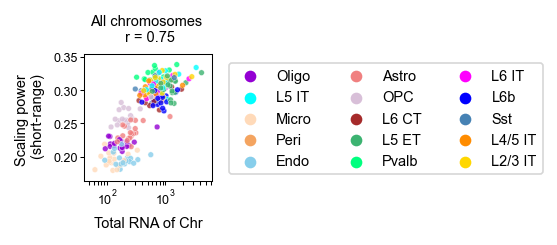

In [38]:
genomic_range = 'short_range'
sel_scaling_result_df = scaling_result_df[scaling_result_df['genomic_range']==genomic_range]


sel_scaling_result_df['rna_total'] = sel_scaling_result_df.apply(lambda row: rna_total_byChr_byCelltype_map(row['celltype'], 
                                                                                                       row['chr']), axis=1)
plot_df  = sel_scaling_result_df.copy(deep=True)

fig, ax =plt.subplots(figsize=(1.1,1.1), dpi=150)

x_col, y_col = 'rna_total','k'
sns.scatterplot(data = plot_df, x=x_col, y=y_col, 
                s=7.5,alpha=0.8,
                ax=ax, hue='celltype', palette=celltype_palette,rasterized=True, legend=True)


ax.set_ylabel('Scaling power \n (short-range)', fontsize=7)
ax.set_xlabel('Total RNA of Chr', fontsize=7)

plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=7)

r_val = spearmanr(plot_df[x_col].values, plot_df[y_col].values, nan_policy='omit')[0]
#ax.text(9e2,0.2,f'r = {round(r_val,2)}',fontsize=_font_size+1)

ax.set_title(f'All chromosomes \n r = {round(r_val,2)}', fontsize=7)
#plt.ylim([0,1.5])
#plt.xlim([0,0.2])
#ax.set_title(f'All Chr averaged', fontsize=7)
ax.margins(0.1)
plt.xscale('log')

ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
[i[1].set_linewidth(0.5) for i in ax.spines.items()]


plt.savefig(os.path.join(output_figure_folder,f'scatter_scaling_vs_chrRNA_short_range.pdf'),
            transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()

## Long-range

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_29832\1854730997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_scaling_result_df['rna_total'] = sel_scaling_result_df.apply(lambda row: rna_total_byChr_byCelltype_map(row['celltype'],
meta NOT subset; don't know how to subset; dropped


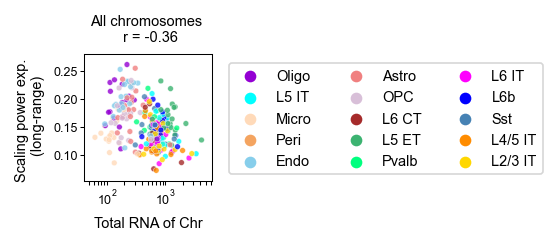

In [40]:
genomic_range = 'long_range'
sel_scaling_result_df = scaling_result_df[scaling_result_df['genomic_range']==genomic_range]

sel_scaling_result_df['rna_total'] = sel_scaling_result_df.apply(lambda row: rna_total_byChr_byCelltype_map(row['celltype'], 
                                                                                                       row['chr']), axis=1)
plot_df  = sel_scaling_result_df.copy(deep=True)

fig, ax =plt.subplots(figsize=(1.1,1.1), dpi=150)

x_col, y_col = 'rna_total','k'
sns.scatterplot(data = plot_df, x=x_col, y=y_col, 
                s=7.5,alpha=0.8,
                ax=ax, hue='celltype', palette=celltype_palette,rasterized=True, legend=True)


ax.set_ylabel('Scaling power exp. \n (long-range)', fontsize=7)
ax.set_xlabel('Total RNA of Chr', fontsize=7)

plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=7)

r_val = spearmanr(plot_df[x_col].values, plot_df[y_col].values, nan_policy='omit')[0]
#ax.text(9e2,0.2,f'r = {round(r_val,2)}',fontsize=_font_size+1)

ax.set_title(f'All chromosomes \n r = {round(r_val,2)}', fontsize=7)
#plt.ylim([0,1.5])
#plt.xlim([0,0.2])
#ax.set_title(f'All Chr averaged', fontsize=7)
ax.margins(0.1)
plt.xscale('log')

ax.tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
[i[1].set_linewidth(0.5) for i in ax.spines.items()]


plt.savefig(os.path.join(output_figure_folder,f'scatter_scaling_vs_chrRNA_long_range.pdf'),
            transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()